In [30]:
pip install scikit-learn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install --upgrade scikit-image

Note: you may need to restart the kernel to use updated packages.


In [32]:
# cell 1 - Import Libraries
# Import required libraries

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import numpy as np


# Allow inline display of plots in Colab
%matplotlib inline


print("All libraries imported successfully ✓")

All libraries imported successfully ✓


Number of samples: 1560
Image shape (h, w): (50, 37)
Flattened dimension d: 1850
Number of classes: 12


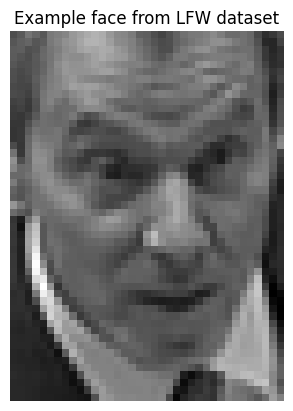

In [33]:
# cell 2 - Load LFW dataset
# Load the LFW dataset
# min_faces_per_person = 50 keeps only people with enough images
# resize = 0.4 reduces image size to speed up computation


lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)


# Extract image data
images = lfw_people.images         # shape: (n_samples, h, w)
X = lfw_people.data                # flattened data, shape: (n_samples, h*w)
y = lfw_people.target
target_names = lfw_people.target_names


n_samples, h, w = images.shape
d = X.shape[1]


print("Number of samples:", n_samples)
print("Image shape (h, w):", (h, w))
print("Flattened dimension d:", d)
print("Number of classes:", len(target_names))


# Display an example image
plt.imshow(images[0], cmap="gray")
plt.title("Example face from LFW dataset")
plt.axis("off")
plt.show()


In [34]:
# cell 3 - Train/Test split
# Split the dataset into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(
   X, y,
   test_size=0.25,
   random_state=42,
   stratify=y      # ensures balanced distribution of classes
)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1170, 1850)
X_test shape: (390, 1850)
y_train shape: (1170,)
y_test shape: (390,)


In [35]:
# cell 4 - Train PCA
# Set the number of principal components
n_components = 150


# Create PCA model
pca = PCA(
   n_components=n_components,
   svd_solver='randomized',  # faster for high-dimensional data
   whiten=True,
   random_state=42
)


# Fit PCA on the training data
pca.fit(X_train)


# Transform both training and test sets
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


print("PCA training completed ✓")
print("Original dimension:", X_train.shape[1])
print("Reduced dimension:", X_train_pca.shape[1])

PCA training completed ✓
Original dimension: 1850
Reduced dimension: 150


/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by z

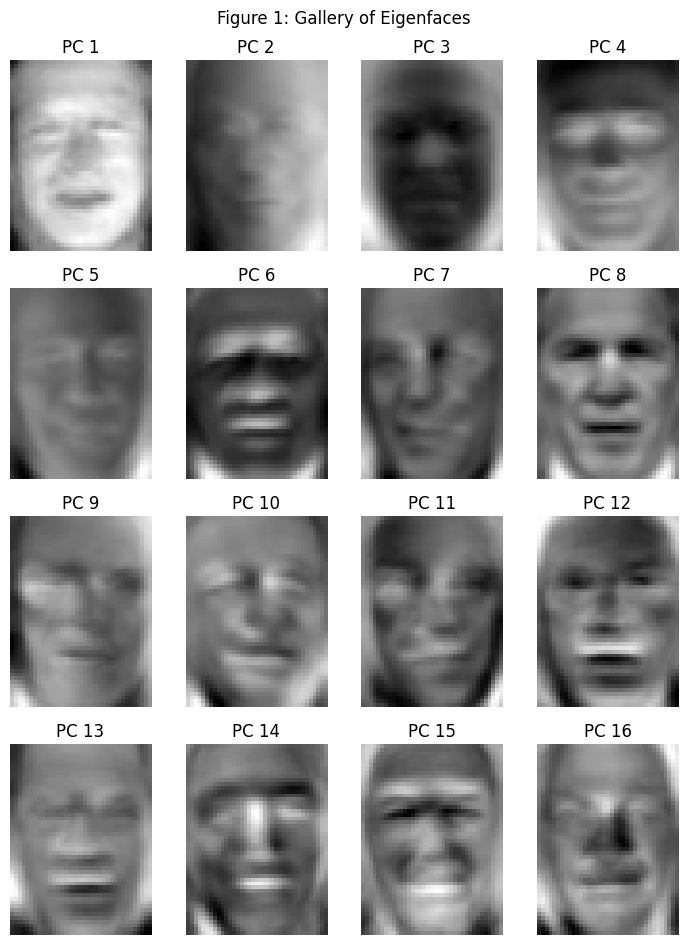

In [36]:


# cell 5 - Figure 1: Eigenfaces Gallery
# Function to visualize eigenfaces


def plot_eigenfaces(pca, h, w, n_row=4, n_col=4):
   """
   Display the first n_row * n_col principal components
   reshaped back into image form (Eigenfaces).
   """
   eigenfaces = pca.components_.reshape((pca.n_components_, h, w))


   plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
   for i in range(n_row * n_col):
       ax = plt.subplot(n_row, n_col, i + 1)
       ax.imshow(eigenfaces[i], cmap="gray")
       ax.set_title(f"PC {i+1}")
       ax.axis("off")


   plt.suptitle("Figure 1: Gallery of Eigenfaces")
   plt.tight_layout()
   plt.show()


# Plot the first 16 eigenfaces
plot_eigenfaces(pca, h, w, n_row=4, n_col=4)

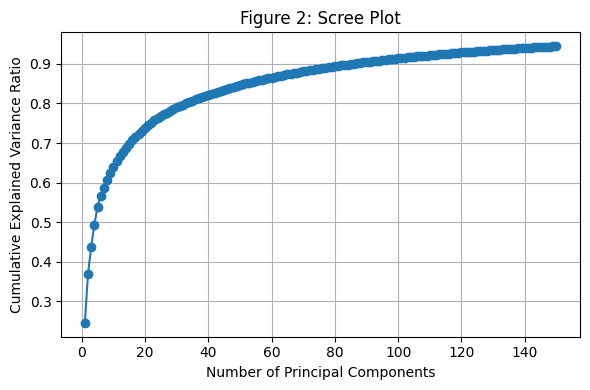

Cumulative variance for first 10 components: 0.6403
Cumulative variance for first 20 components: 0.7388
Cumulative variance for first 50 components: 0.8464
Cumulative variance for first 100 components: 0.9139
Cumulative variance for first 150 components: 0.9448


In [37]:
# cell 6 - Figure 2: Screen Plot
# Explained variance ratio of each component
explained_var_ratio = pca.explained_variance_ratio_


# Cumulative explained variance
cumulative_explained = np.cumsum(explained_var_ratio)
components_axis = np.arange(1, len(cumulative_explained) + 1)


# Scree Plot
plt.figure(figsize=(6, 4))
plt.plot(components_axis, cumulative_explained, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Figure 2: Scree Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


# Print useful values for your report
for k in [10, 20, 50, 100, len(cumulative_explained)]:
   if k <= len(cumulative_explained):
       print(f"Cumulative variance for first {k} components: {cumulative_explained[k-1]:.4f}")




In [38]:
# cell 7 - Member B: Data Collection (Novelty) & Preparation
# Task: Generate/Load "Non-Face" and "Non-Human Face" data
from skimage import data, io
from skimage.transform import resize
import numpy as np
import os

# 1. Select a generic Human Face from the test set (Positive Control)
face_img = X_test[0].reshape(h, w)

# 2. Load "Camera" Image (Structured Non-Face Object)
camera_original = data.camera()
camera_img = resize(camera_original, (h, w), anti_aliasing=True)

# 3. Load "Chimpanzee" Image (Non-Human Face)
# We use a try-except block to ensure the code works even if the internet fails
#chimp_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Schimpanse_Zoo_Leipzig.jpg/640px-Schimpanse_Zoo_Leipzig.jpg"
chimp_url = "./images/chimpanzee.png"

try:
    print(f"Attempting to download Chimpanzee image from: {chimp_url}")
    chimp_original = io.imread(chimp_url, as_gray=True)
    chimp_img = resize(chimp_original, (h, w), anti_aliasing=True)
    print("Success: Chimpanzee image loaded.")
    animal_name = "Chimpanzee"
    
except Exception as e:
    print(f"Warning: Could not download Chimpanzee image ({e}).")
    print("Fallback: Using built-in 'Cat' image (skimage.data.chelsea) instead.")
    # Fallback to internal Cat image so code doesn't break
    chimp_original = data.chelsea()
    chimp_img = resize(chimp_original, (h, w), anti_aliasing=True)
    # Convert RGB to Gray if needed (Chelsea is RGB)
    if len(chimp_img.shape) == 3:
        chimp_img = np.mean(chimp_img, axis=2)
    animal_name = "Cat (Fallback)"

# 4. Generate "Noise" (Random Control)
noise_img = np.random.random((h, w))

# Flatten all images to match PCA input shape (1, h*w)
face_flat = face_img.reshape(1, -1)
camera_flat = camera_img.reshape(1, -1)
chimp_flat = chimp_img.reshape(1, -1)
noise_flat = noise_img.reshape(1, -1)

print("\nNovelty Data Prepared:")
print("1. Human Face (Test Set)")
print("2. Camera (Structured Object)")
print(f"3. {animal_name} (Non-Human Face)")
print("4. Noise (Random Control)")


Attempting to download Chimpanzee image from: ./images/chimpanzee.png
Success: Chimpanzee image loaded.

Novelty Data Prepared:
1. Human Face (Test Set)
2. Camera (Structured Object)
3. Chimpanzee (Non-Human Face)
4. Noise (Random Control)


/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packag

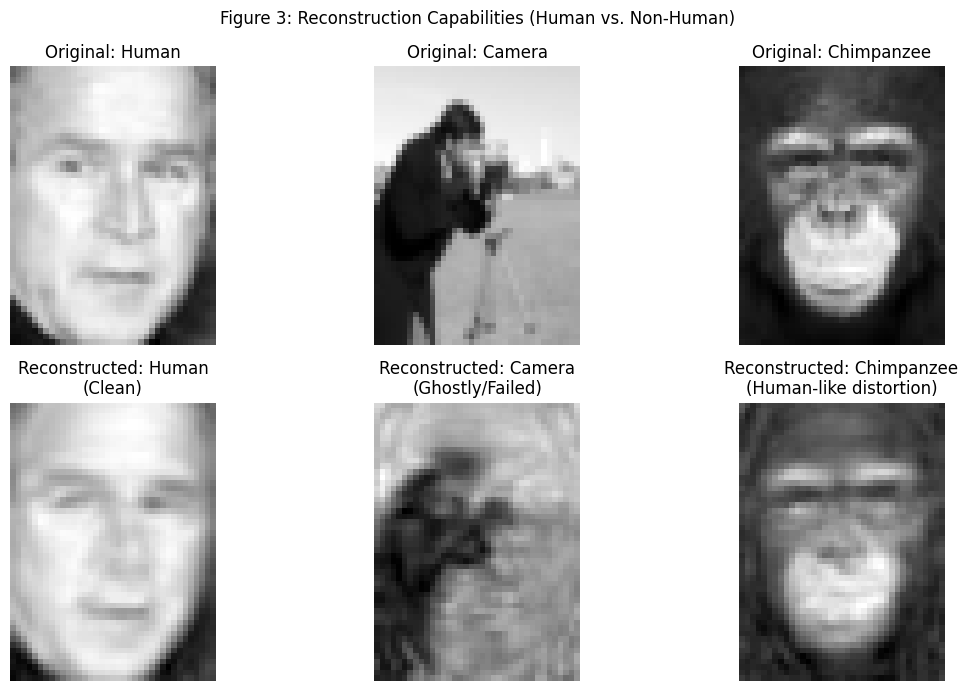

In [39]:

# cell 8 - Member B: Figure 3 (Reconstruction Comparison)
# Task: Visually compare how the model attempts to reconstruct different inputs

def reconstruct_single_image(pca_model, image_flat):
    """Projects image to latent space and reconstructs it."""
    # Project to 150 dim and reconstruct
    projected = pca_model.transform(image_flat)
    reconstructed = pca_model.inverse_transform(projected)
    return reconstructed.reshape(h, w)

# Reconstruct all samples
recon_face = reconstruct_single_image(pca, face_flat)
recon_camera = reconstruct_single_image(pca, camera_flat)
recon_chimp = reconstruct_single_image(pca, chimp_flat)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

# Row 1: Originals
axes[0, 0].imshow(face_img, cmap='gray')
axes[0, 0].set_title("Original: Human")
axes[0, 1].imshow(camera_img, cmap='gray')
axes[0, 1].set_title("Original: Camera")
axes[0, 2].imshow(chimp_img, cmap='gray')
axes[0, 2].set_title("Original: Chimpanzee")

# Row 2: Reconstructions
axes[1, 0].imshow(recon_face, cmap='gray')
axes[1, 0].set_title("Reconstructed: Human\n(Clean)")
axes[1, 1].imshow(recon_camera, cmap='gray')
axes[1, 1].set_title("Reconstructed: Camera\n(Ghostly/Failed)")
axes[1, 2].imshow(recon_chimp, cmap='gray')
axes[1, 2].set_title("Reconstructed: Chimpanzee\n(Human-like distortion)")

for ax in axes.flat:
    ax.axis('off')

plt.suptitle("Figure 3: Reconstruction Capabilities (Human vs. Non-Human)")
plt.tight_layout()
plt.show()





In [ ]:
# cell 9 - Member B: Figure 3 (Reconstruction Loop)
# Task: Visualize reconstruction at varying k for Human, Chimp, and Camera

def reconstruct_at_k(pca_model, flat_data, k, h, w):
    """
    Project image to latent space, keep only top k components,
    and reconstruct back to original space.
    """
    # 1. Transform to latent space (coefficients)
    coords = pca_model.transform(flat_data)
    
    # 2. Zero out all components beyond k
    # Make a copy so we don't modify the original
    coords_k = coords.copy()
    coords_k[:, k:] = 0 
    
    # 3. Inverse transform and reshape
    reconstruction = pca_model.inverse_transform(coords_k)
    return reconstruction.reshape(h, w)

# Define the subjects to plot (Name, Flat Data, Original 2D Image)
subjects = [
    ("Human", face_flat, face_img),
    ("Chimpanzee", chimp_flat, chimp_img),
    ("Camera", camera_flat, camera_img)
]

# Define k values (components) to visualize
k_values = [10, 50, 100, 150]

# Setup the plot grid
# Rows = Subjects (3), Cols = Original + len(k_values)
n_rows = len(subjects)
n_cols = len(k_values) + 1

plt.figure(figsize=(2.5 * n_cols, 2.5 * n_rows))

for i, (name, flat_data, original_img) in enumerate(subjects):
    
    # --- Column 1: Original Image ---
    ax = plt.subplot(n_rows, n_cols, i * n_cols + 1)
    ax.imshow(original_img, cmap='gray')
    ax.set_title(f"Original\n{name}")
    ax.axis('off')
    
    # --- Columns 2 to 5: Reconstructions at varying k ---
    for j, k in enumerate(k_values):
        recon_img = reconstruct_at_k(pca, flat_data, k, h, w)
        
        ax = plt.subplot(n_rows, n_cols, i * n_cols + j + 2)
        ax.imshow(recon_img, cmap='gray')
        ax.set_title(f"k = {k}")
        ax.axis('off')

plt.suptitle("Figure 3: Reconstruction Loop (Varying k)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:


# cell 9 - Member B: The Novelty Experiment (Anomaly Detection)
# Task: Calculate MSE to quantify "Ghosting" error

def get_reconstruction_error(pca_model, flat_data):
    projected = pca_model.transform(flat_data)
    reconstructed = pca_model.inverse_transform(projected)
    return np.mean((flat_data - reconstructed) ** 2)

# Calculate Errors
mse_face = get_reconstruction_error(pca, face_flat)
mse_camera = get_reconstruction_error(pca, camera_flat)
mse_chimp = get_reconstruction_error(pca, chimp_flat)
mse_noise = get_reconstruction_error(pca, noise_flat)

# Bar Chart
labels = ['Human', 'Chimpanzee', 'Camera', 'Noise']
values = [mse_face, mse_chimp, mse_camera, mse_noise]
colors = ['green', 'orange', 'red', 'gray']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=colors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.title("Anomaly Detection Scores (Lower MSE = Better Fit)")
plt.ylabel("Mean Squared Error (Reconstruction Loss)")
plt.ylim(0, max(values) * 1.2) # Add headroom for text
plt.grid(axis='y', linestyle='--', alpha=0.5)

print(f"Human MSE: {mse_face:.5f}")
print(f"Chimp MSE: {mse_chimp:.5f}")
print(f"Camera MSE: {mse_camera:.5f}")
plt.show()

/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/vhehf/Desktop/Personal materials/USA/USC/25 Fall/Intro to Linear Algebra/FinalProject/facial-recognition-with-PCA/.venv/lib/python3.9/site-packag

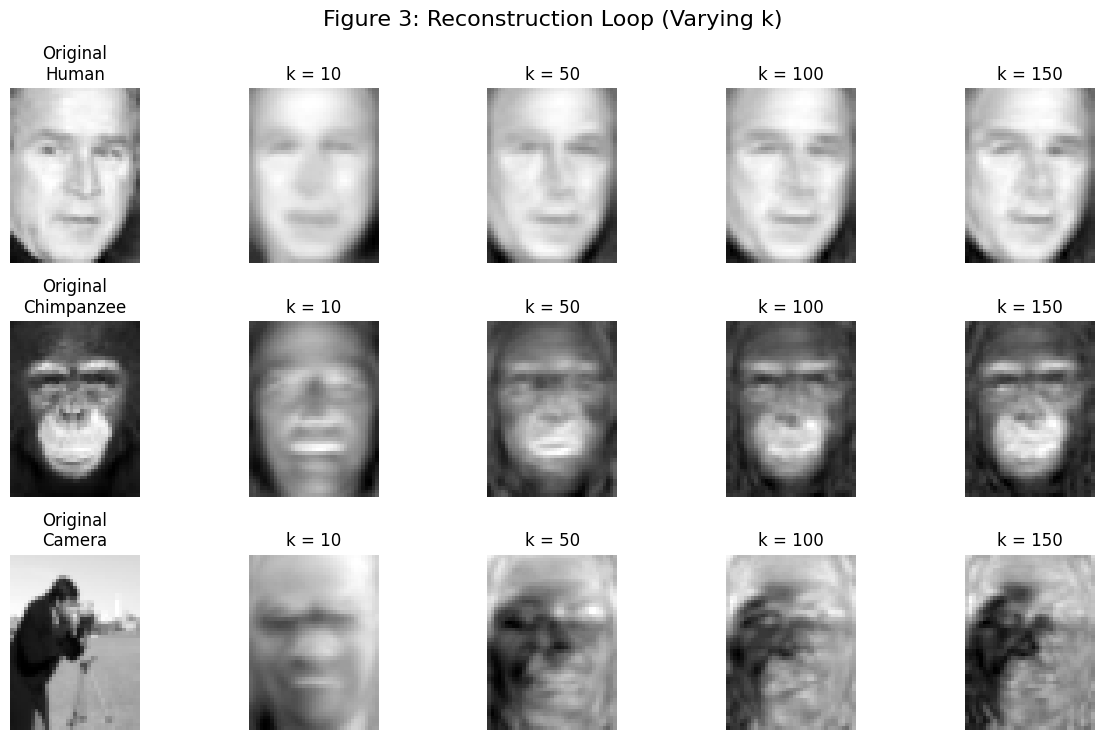